In [7]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np 

s3 = boto3.resource('s3')
bucket_name = "rachaeld-data445"
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the data-file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
from sklearn.model_selection import train_test_split

# defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

# splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2)

In [10]:
from sklearn.linear_model import LinearRegression

# building the linear model 
lm_md = LinearRegression().fit(X_train, Y_train)

In [11]:
# predicting on test
lm_pred = lm_md.predict(X_test)
lm_pred

array([45.05621897, 52.07047092, 31.49453553, 37.57397209, 44.50596688,
       31.9925161 , 38.56215698, 23.79879016, 34.74298205, 47.69799011,
       14.68148528, 48.4026413 , 47.45493854, 39.75584218, 42.1586352 ,
       37.17403561, 30.22387163, 43.78686407, 45.76421075, 11.90618564,
       42.27686385, 37.8349115 , 51.96768812, 33.07369335, 15.29718046,
       31.07189033, 15.23660769, 30.14592201, 43.30663175, 48.52378683,
       44.11463653, 36.36889806, 34.29992524, 51.71612955, 42.94187152,
       54.37014406, 45.31030754, 44.99164036, 41.64071576, 45.76421075,
       15.0548894 , 45.98852317, 40.4898937 , 24.01387634, 44.28112995,
       52.24065373, 54.46100321, 46.25220974, 37.94075966, 31.41752801,
       47.32667852, 41.89606277, 39.40605142, 51.71612955, 30.90627412,
        2.62001425, 40.11140601, 37.525529  , 39.37280677, 34.18163376,
       37.87755444, 35.24878201, 41.86577639, 28.30361763, 34.08511303,
       49.37778613, 35.2475347 , 45.52231221, 39.12372118, 32.34

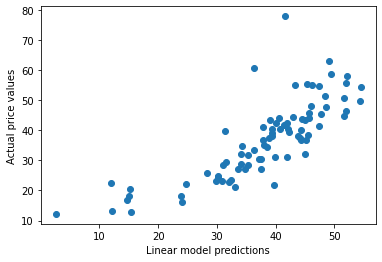

In [14]:
import matplotlib.pyplot as plt

plt.scatter( lm_pred,  Y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual price values')
plt.show()

In [15]:
# computing the mse
np.mean((Y_test - lm_pred)**2)

#want a model with a smaller mse- better

61.80014090064308